In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
data = pd.read_csv("household_power_consumption.txt",
                  sep=';',
                  index_col=False)

<ipython-input-2-45881989677e>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("household_power_consumption.txt",


In [3]:
cols = data.columns.drop(['Date', 'Time'])
data[cols] = data[cols].apply(pd.to_numeric,
                              errors='coerce')
data['Date'] = pd.to_datetime(data['Date'],
                             format='%d/%m/%Y')
data['Time'] = pd.to_datetime(data['Time'],
                             format='%H:%M:%S').dt.time


In [5]:
data.dtypes

Date                     datetime64[ns]
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object

In [15]:
def time_convert(x):
    h = x.hour
    m = x.minute
    s = x.second
    return (h*60+m)*60+s


In [16]:
data['Seconds'] = data['Time'].apply(time_convert)

In [17]:
data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Seconds
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,62640
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,62700
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,62760
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,62820
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,62880
...,...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,75480
2075255,2010-11-26,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,75540
2075256,2010-11-26,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,75600
2075257,2010-11-26,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0,75660


In [18]:
data.isnull().sum().sum()

181853

In [19]:
nan_values = data[data.isna().any(axis=1)]
nan_values

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Seconds
6839,2006-12-21,11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40980
6840,2006-12-21,11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41040
19724,2006-12-30,10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36480
19725,2006-12-30,10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36540
41832,2007-01-14,18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66960
...,...,...,...,...,...,...,...,...,...,...
1990185,2010-09-28,19:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68940
1990186,2010-09-28,19:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69000
1990187,2010-09-28,19:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69060
1990188,2010-09-28,19:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69120


In [20]:
data = data.fillna(0)

In [21]:
data.loc[[0]]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Seconds
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,62640


In [22]:
data.loc[[2075258]]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Seconds
2075258,2010-11-26,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0,75720


In [23]:
data['Weekday'] = data['Date'].dt.dayofweek

In [24]:
data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Seconds,Weekday
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,62640,5
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,62700,5
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,62760,5
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,62820,5
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,62880,5
...,...,...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,75480,4
2075255,2010-11-26,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,75540,4
2075256,2010-11-26,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,75600,4
2075257,2010-11-26,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0,75660,4


In [25]:
friday_data = data.loc[data['Weekday'] == 4]

In [26]:
friday_data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Seconds,Weekday
7596,2006-12-22,00:00:00,0.206,0.000,245.70,0.8,0.0,0.0,0.0,0,4
7597,2006-12-22,00:01:00,0.206,0.000,246.18,0.8,0.0,0.0,0.0,60,4
7598,2006-12-22,00:02:00,0.328,0.130,245.61,1.4,0.0,0.0,0.0,120,4
7599,2006-12-22,00:03:00,0.314,0.128,244.63,1.4,0.0,0.0,0.0,180,4
7600,2006-12-22,00:04:00,0.310,0.128,244.51,1.4,0.0,0.0,0.0,240,4
...,...,...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,75480,4
2075255,2010-11-26,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,75540,4
2075256,2010-11-26,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,75600,4
2075257,2010-11-26,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0,75660,4


In [27]:
sns.set_theme(style='darkgrid')

In [28]:
friday_dec_22 = friday_data.loc[friday_data['Date']=='2006-12-22']

<AxesSubplot:xlabel='Seconds', ylabel='Voltage'>

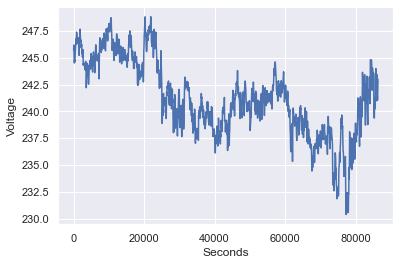

In [30]:
sns.lineplot(data=friday_dec_22,
            x='Seconds',
            y='Voltage')

<AxesSubplot:xlabel='Seconds', ylabel='Global_active_power'>

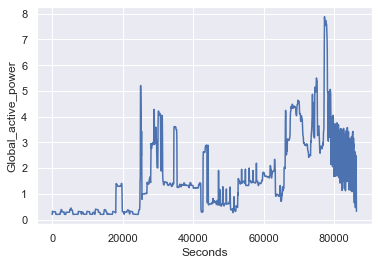

In [31]:
sns.lineplot(data=friday_dec_22,
            x='Seconds',
            y='Global_active_power')

<AxesSubplot:xlabel='Seconds', ylabel='Global_reactive_power'>

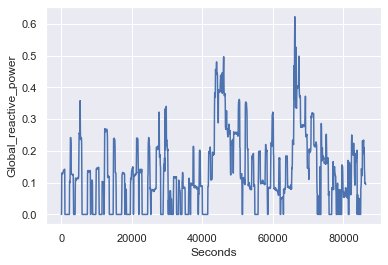

In [32]:
sns.lineplot(data=friday_dec_22,
            x='Seconds',
            y='Global_reactive_power')

<AxesSubplot:xlabel='Seconds', ylabel='Global_intensity'>

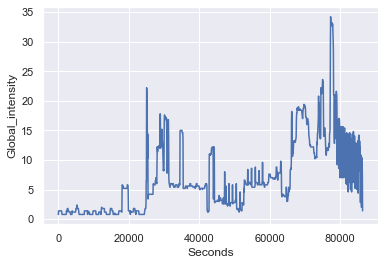

In [33]:
sns.lineplot(data=friday_dec_22,
            x='Seconds',
            y='Global_intensity')